In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('Cardio_synthetic.csv')

In [8]:
data.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,51,130,305,142,1.2,0,3,0,0,1,1,0,3,1
1,70,145,174,125,2.6,1,3,0,0,1,2,0,3,1
2,60,130,253,144,1.4,1,3,0,0,1,0,1,3,1
3,54,108,267,167,0.0,0,2,0,2,0,0,0,1,0
4,52,120,325,172,0.2,1,1,0,0,0,0,0,1,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()

In [5]:
df1=pd.DataFrame(data[['chol','trestbps','thalach']])
df1

,chol,trestbps,thalach
0,305,130,142
1,174,145,125
2,253,130,144
3,267,108,167
4,325,120,172
...,...,...,...
1999995,300,125,171
1999996,237,120,71
1999997,249,120,144
1999998,209,124,163


In [6]:
df2=norm.fit_transform(df1)

In [7]:
data1=pd.DataFrame(df2)

In [21]:
data1

,0,1,2
0,0.408676,0.367347,0.572581
1,0.109589,0.520408,0.435484
2,0.289954,0.367347,0.588710
3,0.321918,0.142857,0.774194
4,0.454338,0.265306,0.814516
...,...,...,...
1999995,0.397260,0.316327,0.806452
1999996,0.253425,0.265306,0.000000
1999997,0.280822,0.265306,0.588710
1999998,0.189498,0.306122,0.741935


In [9]:
data3=data

In [10]:
data3.drop(data[['chol','trestbps','thalach']],axis=1,inplace=True)

In [40]:
data3

,age,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target,chol,trestbps,thalach
0,51,1.2,0,3,0,0,1,1,0,3,1,0.408676,0.367347,0.572581
1,70,2.6,1,3,0,0,1,2,0,3,1,0.109589,0.520408,0.435484
2,60,1.4,1,3,0,0,1,0,1,3,1,0.289954,0.367347,0.588710
3,54,0.0,0,2,0,2,0,0,0,1,0,0.321918,0.142857,0.774194
4,52,0.2,1,1,0,0,0,0,0,1,0,0.454338,0.265306,0.814516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,58,0.0,1,3,0,2,0,0,2,3,1,0.397260,0.316327,0.806452
1999996,67,1.0,1,3,0,0,0,1,0,1,1,0.253425,0.265306,0.000000
1999997,46,0.8,1,3,0,2,0,0,0,3,1,0.280822,0.265306,0.588710
1999998,62,0.0,0,3,0,0,0,0,0,1,0,0.189498,0.306122,0.741935


<Axes: >

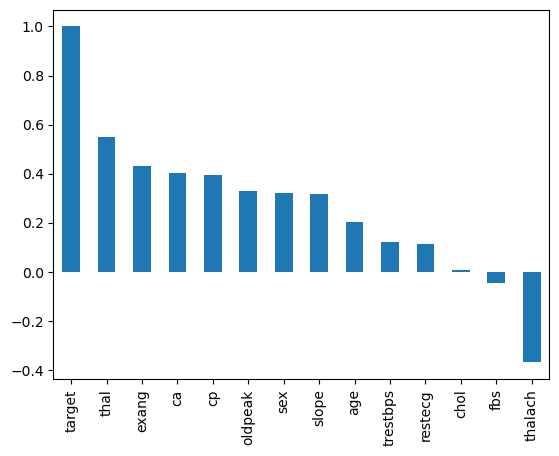

In [41]:
data.corr()['target'].sort_values(ascending=False).plot(kind='bar')

In [45]:
labels=['{0}-{1}'.format(i,i+10) for i in range(1,77,11)]


In [46]:
labels

['1-11', '12-22', '23-33', '34-44', '45-55', '56-66', '67-77']

In [47]:
data3['label_counts']=pd.cut(data3.age,range(1,80,11),labels=labels,right=True)

In [49]:
data3.label_counts.value_counts()

label_counts
56-66    846808
45-55    653743
34-44    387426
67-77    112023
1-11          0
12-22         0
23-33         0
Name: count, dtype: int64

In [53]:
data3

,age,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target,chol,trestbps,thalach
0,51,1.2,0,3,0,0,1,1,0,3,1,0.408676,0.367347,0.572581
1,70,2.6,1,3,0,0,1,2,0,3,1,0.109589,0.520408,0.435484
2,60,1.4,1,3,0,0,1,0,1,3,1,0.289954,0.367347,0.588710
3,54,0.0,0,2,0,2,0,0,0,1,0,0.321918,0.142857,0.774194
4,52,0.2,1,1,0,0,0,0,0,1,0,0.454338,0.265306,0.814516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,58,0.0,1,3,0,2,0,0,2,3,1,0.397260,0.316327,0.806452
1999996,67,1.0,1,3,0,0,0,1,0,1,1,0.253425,0.265306,0.000000
1999997,46,0.8,1,3,0,2,0,0,0,3,1,0.280822,0.265306,0.588710
1999998,62,0.0,0,3,0,0,0,0,0,1,0,0.189498,0.306122,0.741935


In [11]:
data3.drop('label_counts',axis=1,inplace=True)

KeyError: "['label_counts'] not found in axis"

In [12]:
X=data3.drop('target',axis=1)
y=data['target']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=6)

In [16]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [92]:
print(dtc.max_depth)

6


In [17]:
pred=dtc.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [94]:
print(accuracy_score(y_test,pred))

0.9743716666666666


In [102]:
data4 = {
    "age": [56, 63, 48, 59, 52],
    "oldpeak": [1.2, 1.8, 0.5, 0.9, 1.1],
    "sex": [1, 0, 1, 0, 1],
    "cp": [1, 2, 3, 1, 2],
    "fbs": [0, 1, 0, 1, 0],
    "restecg": [0, 1, 0, 1, 0],
    "exang": [1, 0, 1, 0, 1],
    "slope": [1, 2, 1, 2, 1],
    "ca": [0, 1, 0, 1, 0],
    "thal": [3, 2, 3, 2, 3],
    "chol": [0.421567, 0.398743, 0.415234, 0.432678, 0.410987],
    "trestbps": [0.371245, 0.360987, 0.382134, 0.359876, 0.375643],
    "thalach": [0.59012, 0.56234, 0.57987, 0.55231, 0.57098]}
test=pd.DataFrame(data4)

In [103]:
pred1=dtc.predict(test)

In [104]:
print(pred1)

[1 0 1 1 1]


In [18]:
prob=dtc.predict_proba(X_test)[:,1]

[0.33458687 1.         0.         ... 0.         1.         0.        ]


In [23]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

In [26]:
prob_true, prob_pred = calibration_curve(y_test,prob, n_bins=10)


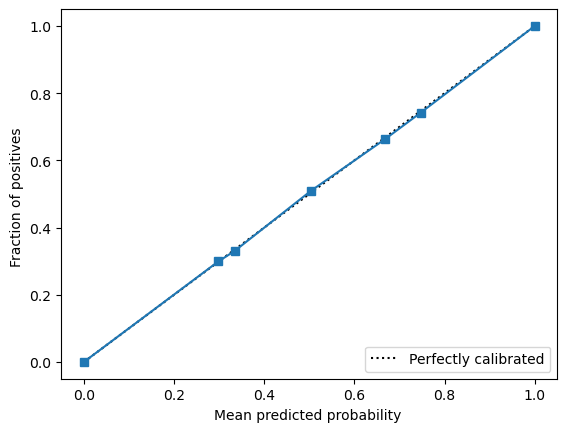

In [27]:
disp = CalibrationDisplay(prob_true, prob_pred, prob)
disp.plot()

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)


In [29]:
auc

0.992180929602517

In [30]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 9.8 MB/s eta 0:00:16
   - -------------------------------------- 4.2/150.0 MB 10.5 MB/s eta 0:00:14
   - -------------------------------------- 6.6/150.0 MB 10.6 MB/s eta 0:00:14
   -- ------------------------------------- 8.9/150.0 MB 10.6 MB/s eta 0:00:14
   --- ------------------------------------ 11.3/150.0 MB 10.8 MB/s eta 0:00:13
   --- ------------------------------------ 13.6/150.0 MB 11.0 MB/s eta 0:00:13
   ---- ----------------------------------- 16.0/150.0 MB 10.9 MB/s eta 0:00:13
   ---- ----------------------------------- 18.6/150.0 MB 11.1 MB/s eta 0:00:12
   ----- ---------------------------------- 21.2/150.0 MB 11.2 MB/s eta 0:00:12
   ------ --------------------------------- 23.9/150.0 MB 11.3 MB/s eta 0:00:12
   ------ --------------------------------- 26.2/150.0 MB 11.3 MB/s eta 0:00:11
   ------- -------------------------------- 28.8/150.0

In [31]:
import xgboost as xgb

In [33]:
boost=xgb.XGBClassifier()

In [32]:
params={
    'n_estimators':[1000,2000,10000],
    'max_depth':[3,4,5,6],
    'sub_sample':[0.7,0.8,0.9],
    'gamma':[0,0.5,1,1.5,2],
    'min_child_weight':[100,200,300]
}

In [34]:
from sklearn.model_selection import GridSearchCV
grids=GridSearchCV(estimator=boost,param_grid=params,cv=5,verbose=2,n_jobs=-1)

In [35]:
grids.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


KeyboardInterrupt: 